In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import dalmatian
from scipy import stats
import statistics as stat
import sys

In [2]:
plt.rcParams['svg.fonttype'] = 'none'

In [ ]:
## i should come up with a better way to import all files but this is what I got for now

## Import RA Files

### Mut CCFs

In [3]:

pat_1598 = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1598_new_pon_results/1598.mut_ccfs.txt", sep='\t')



pat_1078 = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1078_new_pon_results/1078.mut_ccfs.txt", sep='\t')


pat_1326 = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1326_firecloud_phylo/1326_cfDNA_high_purity.mut_ccfs.txt", sep='\t')
pat_1644 = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1644_passed_muts_results/1644.mut_ccfs.txt", sep='\t')

pat_2819 = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/2819_passed_muts_results/2819.mut_ccfs.txt", sep='\t',
                      low_memory=False)
pat_2389 = pd.read_csv("/Users/lmartin/Documents/2023/2389_multiple_6_bl_tree_0515/2389_multiple_6_bl_tree_v1/2389_multiple_6.mut_ccfs.txt", sep='\t',
                      low_memory=False)

pat_2974 = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/2974_new_pon_results/2974.mut_ccfs.txt", sep='\t')

pat_1035 = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1035_with_indel/1035.mut_ccfs.txt", sep='\t')

pat_1002 = pd.read_csv('~/Documents/2020/new_pon_breast_phylo/1002_pre_post_updated/1002_with_pre_post.mut_ccfs.txt',sep='\t',
                          low_memory=False)
pat_1534 = pd.read_csv('~/Documents/2024/RA_1534_vm_new_bams/RA_1534_bl_TBX/1534_bl_TBX/1534.mut_ccfs.txt',sep='\t')

pat_1547 = pd.read_csv('~/Documents/2020/new_pon_breast_phylo/1547_0915/1547_newer_bl_tree/1547.mut_ccfs.txt',sep='\t',
                          low_memory=False)

pat_1558 = pd.read_csv('~/Documents/2023/RA_1558_fix_pies/take_3/1558_fix_pies_v3/1558.mut_ccfs.txt',sep='\t')

pat_2542 = pd.read_csv('~/Documents/2023/RA_2542_PIK3CA/2542_high_purity_v6_morebl_moreiter_results/2542_high_purity_v6_morebl_moreiter.mut_ccfs.txt',sep='\t')

pat_1045 = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1045_vm_phylo_results/1045.mut_ccfs.txt",sep='\t',low_memory=False)

pat_1113 =pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1113_vm_phylo_results/1113.mut_ccfs.txt",sep='\t')


pats_list = [pat_1002, pat_1547, pat_1598, pat_1078, pat_1113,pat_2389,pat_1045,
            pat_1326, pat_1644, pat_2819, pat_2974, pat_1035, pat_1534, pat_1558, pat_2542]
print(len(pats_list))

15


In [4]:
combined_maf = pd.concat(pats_list)
combined_maf=combined_maf.iloc[:,0:22]
combined_maf.drop(columns=['Sample_Alias'],inplace=True)
combined_maf=combined_maf[combined_maf['t_alt_count']!=0]
combined_maf.drop_duplicates(['Patient_ID','Hugo_Symbol','Start_position','Cluster_Assignment'],inplace=True)

### Cell Populations

In [5]:
pat_1002_cellpop = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1002_updated_apr21/1002_with_pre_post_cell_population_abundances.tsv", sep='\t')

pat_1547_cellpop = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1547_0915/1547_newer_bl_tree/1547_cell_population_abundances.tsv", sep='\t')

pat_1078_cellpop = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1078_new_pon_results/1078_cell_population_abundances.tsv", sep='\t')
pat_1598_cellpop = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1598_new_pon_results/1598_cell_population_abundances.tsv", sep='\t')

pat_1326_cellpop = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1326_firecloud_phylo/1326_cfDNA_high_purity_cell_population_abundances.tsv", sep='\t')
pat_1644_cellpop = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1644_passed_muts_results/1644_cell_population_abundances.tsv", sep='\t')

pat_2819_cellpop = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/2819_passed_muts_results/2819_cell_population_abundances.tsv", sep='\t')
pat_2389_cellpop = pd.read_csv("/Users/lmartin/Documents/2023/2389_multiple_6_bl_tree_0515/2389_multiple_6_bl_tree_v1/2389_multiple_6_cell_population_abundances.tsv", sep='\t')

pat_2974_cellpop = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/2974_new_pon_results/2974_cell_population_abundances.tsv", sep='\t')
pat_1534_cellpop = pd.read_csv("/Users/lmartin/Documents/2024/RA_1534_vm_new_bams/RA_1534_bl_TBX/1534_bl_TBX/1534_cell_population_abundances.tsv", sep='\t')

pat_1035_cellpop = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1035_with_indel/1035_cell_population_abundances.tsv", sep='\t')

pat_1113_cellpop = pd.read_csv('/Users/lmartin/Documents/2020/new_pon_breast_phylo/1113_vm_phylo_results/1113_cell_population_abundances.tsv',sep='\t')
pat_1045_cellpop = pd.read_csv('/Users/lmartin/Documents/2020/new_pon_breast_phylo/1045_vm_phylo_results/1045_cell_population_abundances.tsv',sep='\t')

pat_1558_cellpop = pd.read_csv("/Users/lmartin/Documents/2023/RA_1558_fix_pies/take_3/1558_fix_pies_v3/1558_cell_population_abundances.tsv", sep='\t')


pat_2542_cellpop = pd.read_csv('~/Documents/2023/RA_2542_PIK3CA/2542_high_purity_v6_morebl_moreiter_results/2542_high_purity_v6_morebl_moreiter_cell_population_abundances.tsv',sep='\t')



cellpops=[pat_1002_cellpop,pat_1547_cellpop,pat_1078_cellpop,pat_1598_cellpop,pat_1326_cellpop,pat_1644_cellpop,pat_2819_cellpop,
         pat_2389_cellpop,pat_2974_cellpop,pat_1534_cellpop,pat_1035_cellpop,pat_1113_cellpop,
         pat_1045_cellpop,pat_1558_cellpop,pat_2542_cellpop]


cellpop_df = pd.concat(cellpops)

## Import Biopsy Files

In [11]:
pre_post_maf_all = pd.read_csv('~/Documents/2020/clonal_comut_plot/pre_post_muts_updated_MGH001_0503.tsv',sep='\t',index_col=0)



In [18]:
workspace = 'broad-firecloud-ibmwatson/CDK4-Resistance-Combined'
pcyc_wm = dalmatian.WorkspaceManager(workspace)
pcyc_wm_patients_df = pcyc_wm.get_participants()

biopsy_get_cell_pops = pcyc_wm_patients_df[~pcyc_wm_patients_df['phylo_abundances_tsv_updated'].isna()]['phylo_abundances_tsv_updated']


/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dalmatian/wmanager.py:1370: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x['items'] if isinstance(x, dict) and 'items' in x else x)
/opt/anaconda3/envs/py39/lib/python3.9/site-packages/dalmatian/wmanager.py:1400: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: [i['entityName'] if 'entityName' in i else i for i in x]


In [33]:
prepost_proximal_samples = ['MGH0001-APCCD', 'MGH0001-APCCX',
                            
       'MGHCC0002-Tumor-SM-APCDT', 
        'MGHCC0002-Tumor-SM-APCE4',
                            
        'MGHCC0003-Tumor-SM-APCEE',
       'MGHCC0003-Tumor-SM-APCEN', 
                            
        'MGHCC0004-Tumor-SM-APCGF',
       'MGHCC0004-Tumor-SM-APCGP', 
                            
       'MGHCC0005-Tumor-SM-APCHK', 
        'MGHCC0005-Tumor-SM-APCHU',
                            
       'MGHCC0006-Tumor-SM-APCKR',
       'MGHCC0006-Tumor-SM-APCL8',
                            
        'MGHCC0007-Tumor-SM-APCLX',
       'MGHCC0007-Tumor-SM-APCM8', 
                            
        'MGHCC1002-Tumor-SM-APCMI',
       'MGHCC1002-Tumor-SM-APCMS', 
                            
        'MGHCC1005-Tumor-SM-APCD8',
       'MGHCC1005-Tumor-SM-APCDJ', 
                            
        'MGHCC1006-Tumor-SM-APCEX',
       'MGHCC1006-Tumor-SM-APCF8', 
                            
        'MGHCC1009-Tumor-SM-APCFI',
       'MGHCC1009-Tumor-SM-APCFU',
                            
        'MGHCC1015-Tumor-SM-APCB8',
        'MGHCC1015-Tumor-SM-APCBS',
                            
       'MGHCC1030-Tumor-SM-APCNN', 
        'MGHCC1030-Tumor-SM-APCNX',
                            
       'MGHCC1041-Tumor-SM-APCN3', 
        'MGHCC1041-Tumor-SM-APCND',
                            
       'MGHCC1099-A', 'MGHCC1099-B',
                            
        'MGHCC1101-Tumor-SM-APCLI',
       'MGHCC1101-Tumor-SM-APCLS',
                            
       'MGHCC1108-Tumor-SM-APCJ5',
        'MGHCC1108-Tumor-SM-APCJA',
                             
        'MGHCC1112-Tumor-SM-APCIK',
       'MGHCC1112-Tumor-SM-APCIU', 
                            
        'MGHCC1173-Tumor-SM-APCI6',
       'MGHCC1173-Tumor-SM-APCIF', 

        'MGHCC1573-Tumor-SM-APCJK',
       'MGHCC1573-Tumor-SM-APCJU']

## Autopsy Sample Level statistics

In [7]:
len(combined_maf['Patient_ID'].unique())

15

In [14]:
RA_sample_num_per_pat = [ len(combined_maf[combined_maf['Patient_ID'] == i]['Sample_ID'].unique()) for i in list(combined_maf['Patient_ID'].unique()) ]
print(sorted(RA_sample_num_per_pat))
print(np.median(RA_sample_num_per_pat))


[5, 5, 5, 5, 9, 10, 12, 14, 14, 15, 19, 20, 21, 22, 22]
14.0


## Biopsy Sample Level statistics

In [12]:
print(len(pre_post_maf_all['Patient_ID'].unique()))

22


In [ ]:
## remove 

In [15]:
biopsy_sample_num_per_pat = [len(pre_post_maf_all[pre_post_maf_all['Patient_ID'] == i]['Sample_ID'].unique()) for i in list(pre_post_maf_all['Patient_ID'].unique())]
print(sorted(biopsy_sample_num_per_pat))
print(np.median(biopsy_sample_num_per_pat))


[1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3]
2.0


## Compare sample numbers

In [16]:
stats.mannwhitneyu(RA_sample_num_per_pat, biopsy_sample_num_per_pat)


MannwhitneyuResult(statistic=np.float64(330.0), pvalue=np.float64(1.9056382781106136e-07))

## Compare Cell Populations

In [19]:
def format_cell_pop_df(input_df):
    cell_abundance_df=input_df.copy()
    cell_abundance_df.drop(columns=['Patient_ID'], inplace=True)
    
    cell_pops = list(cell_abundance_df['Cell_population'].unique())
    sample_ids = list(cell_abundance_df['Sample_ID'].unique())
    cell_abundances = list(cell_abundance_df['Cell_abundance'].unique())

    sample_abundance_dict = {}
    for sample in sample_ids:
        sample_abundance_dict[sample] = (cell_abundance_df[cell_abundance_df['Sample_ID'] == sample]['Cell_abundance']).to_list()
    transpose_df = pd.DataFrame.from_dict(sample_abundance_dict,orient='index',columns=cell_pops )
    
    return transpose_df

In [34]:
biopsy_cell_pops = []
for cell_pop in biopsy_get_cell_pops:
    cell_pop_df = pd.read_csv(cell_pop, sep='\t')
    transpose_cell_pop=format_cell_pop_df(cell_pop_df)
    biopsy_cell_pops.append(transpose_cell_pop)

paired_biopsy_cell_pops = []
for df in biopsy_cell_pops:
    paired_biopsy_cell_pops.append(df[df.index.isin(prepost_proximal_samples)])

In [26]:
autopsy_cell_pops = []

for cell_pop in cellpops:
    transpose_cell_pop=format_cell_pop_df(cell_pop)
    autopsy_cell_pops.append(transpose_cell_pop)



In [24]:
def get_all_cell_pops(transpose_ccfs, ccf_thresh):
    cell_pops={}
    unique_cell_pops=[]
    for i,row in transpose_ccfs.iterrows():
        largest_vals=[]
        vals_indices=[]
        for val in row:
            if val > ccf_thresh:
                largest_vals.append(val)
                vals_indices.append(row[row==val].index[0])
                
                unique_cell_pops.append(row[row==val].index[0])
        cell_pops[i]=(largest_vals,vals_indices)
    return set(unique_cell_pops)

In [40]:
pat_cell_pops=[]
for df in autopsy_cell_pops:
    pat_cell_pops.append(get_all_cell_pops(df, 10))

## remove CL1 but keep CL1_
no_clonal_clusts_RA=[]

for vals in pat_cell_pops:
    new_vals=[]
    for val in vals:
        if val!='CL1':
            new_vals.append(val)
    
    no_clonal_clusts_RA.append(new_vals)       
            
            
RA_length=[len(cell_pop) for cell_pop in no_clonal_clusts_RA]
print(RA_length)
print(np.median(RA_length))

[14, 5, 4, 6, 7, 4, 7, 13, 3, 2, 6, 9, 8, 8, 8]
7.0


In [41]:
paired_biopsy_pat_cell_pops=[]
for df in paired_biopsy_cell_pops:
    paired_biopsy_pat_cell_pops.append(get_all_cell_pops(df, 10))

## remove CL1 but keep CL_
no_clonal_clusts_paired_biopsy=[]

for vals in paired_biopsy_pat_cell_pops:
    new_vals=[]
    for val in vals:
        if val!='CL1':
            new_vals.append(val)
    
    no_clonal_clusts_paired_biopsy.append(new_vals)       
            
            
biopsy_length=[len(cell_pop) for cell_pop in no_clonal_clusts_paired_biopsy]
print(biopsy_length)
print(np.median(biopsy_length))

[3, 1, 3, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 0, 0, 4]
2.0


In [42]:
stats.mannwhitneyu(RA_length, biopsy_length)

MannwhitneyuResult(statistic=np.float64(298.5), pvalue=np.float64(2.6686864807167235e-05))

In [47]:
compared_cell_pops=pd.DataFrame({'RA CellPops': pd.Series(RA_length),
                 'Biopsy CellPops': pd.Series(biopsy_length)})

/var/folders/rx/pxwbtcqd6k38h9yc5d3m4k1w0000gp/T/ipykernel_33366/1382199060.py:3: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.violinplot(data=compared_cell_pops,inner="point",orient='v',ax=ax1,palette=sns.color_palette('Paired'),


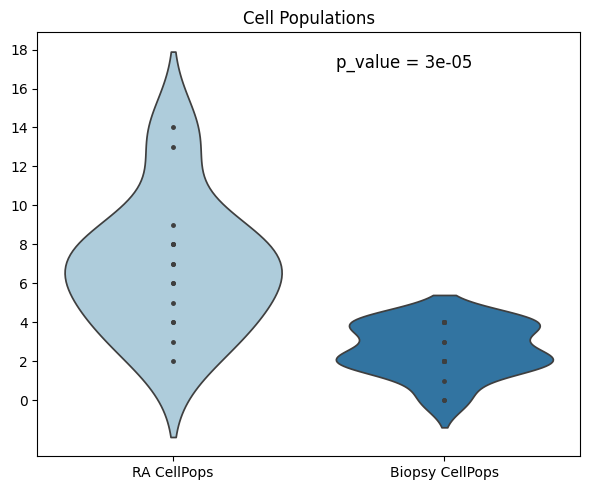

In [48]:
fig,ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
ax1.set_yticks([0,2,4,6,8,10,12,14,16,18,20,22])
sns.violinplot(data=compared_cell_pops,inner="point",orient='v',ax=ax1,palette=sns.color_palette('Paired'),
              native_scale=True).set_title("Cell Populations" )

stat, p_val = stats.mannwhitneyu(RA_length, biopsy_length)

x_coord = 0.55 * (ax1.get_xlim()[1] - ax1.get_xlim()[0]) + ax1.get_xlim()[0]
y_coord = 0.95 * (ax1.get_ylim()[1] - ax1.get_ylim()[0]) + ax1.get_ylim()[0]
ax1.text(x=x_coord, y=y_coord, s="p_value = " + str(round(p_val,5)), ha='left', va='top', fontsize=12)
fig.tight_layout()

fig.savefig('Cell_population_comparison_violinplot_with_pval.svg')

## Compare biopsy patients with 1 and 2 samples vs biopsy patients with 3 samples

In [49]:
patients_with_3_samples=[]
patients_with_few_samples = []

for df in biopsy_cell_pops:
    if len(df)==3:
        patients_with_3_samples.append(df)
    else:
        patients_with_few_samples.append(df)

In [53]:
patients_with_3_samples_cell_pops=[]
for df in patients_with_3_samples:
    patients_with_3_samples_cell_pops.append(get_all_cell_pops(df, 10))

## remove CL1 but keep CL_
no_clonal_clusts_patients_with_3_samples_cell_pops=[]

for vals in patients_with_3_samples_cell_pops:
    new_vals=[]
    for val in vals:
        if val!='CL1':
            new_vals.append(val)
    
    no_clonal_clusts_patients_with_3_samples_cell_pops.append(new_vals)       
            
patients_with_3_samples_biopsy_length=[len(cell_pop) for cell_pop in no_clonal_clusts_patients_with_3_samples_cell_pops]
print(patients_with_3_samples_biopsy_length)
print(np.median(patients_with_3_samples_biopsy_length))

[5, 2, 4, 3, 4, 3, 4, 4]
4.0


In [54]:
patients_with_few_samples_cell_pops=[]
for df in patients_with_few_samples:
    patients_with_few_samples_cell_pops.append(get_all_cell_pops(df, 10))

## remove CL1 but keep CL_
no_clonal_clusts_patients_with_few_samples_cell_pops=[]

for vals in patients_with_few_samples_cell_pops:
    new_vals=[]
    for val in vals:
        if val!='CL1':
            new_vals.append(val)
    
    no_clonal_clusts_patients_with_few_samples_cell_pops.append(new_vals)       
            
            
patients_with_few_samples_biopsy_length=[len(cell_pop) for cell_pop in no_clonal_clusts_patients_with_few_samples_cell_pops]
print(patients_with_few_samples_biopsy_length)
print(np.median(patients_with_few_samples_biopsy_length))

[2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 2, 3, 1, 4]
3.5


In [55]:
stats.mannwhitneyu(patients_with_3_samples_biopsy_length, patients_with_few_samples_biopsy_length)

MannwhitneyuResult(statistic=np.float64(72.5), pvalue=np.float64(0.23725582662349487))

## Compare Mutations in Truncal clone

### Autopsy

In [56]:
autopsy_all_trunks = combined_maf[combined_maf['Cluster_Assignment'] == 1]
autopsy_all_trunks_unique = autopsy_all_trunks.drop_duplicates(['Hugo_Symbol','Start_position','Protein_change'],keep='first')
aut_num_muts_in_trunk = autopsy_all_trunks_unique.groupby('Patient_ID').count()['Sample_ID'].to_list()
print(np.median(aut_num_muts_in_trunk))
autopsy_all_trunks_unique.groupby('Patient_ID').count()['Sample_ID']

51.0


Patient_ID
1035                                    37
1045                                    27
1078                                    37
1113                                    37
1534                                    71
1547                                   218
1558                                    51
1598                                    17
1644                                   161
2819                                    54
2974                                    55
1002_with_pre_post                      79
1326_cfDNA_high_purity                  15
2389_multiple_6                         39
2542_high_purity_v6_morebl_moreiter    346
Name: Sample_ID, dtype: int64

### Biopsy

In [57]:
## get mutations only in paired samples
pre_post_maf_only_pairs = pre_post_maf_all[pre_post_maf_all['Sample_ID'].isin(prepost_proximal_samples)]
pre_post_maf_only_pairs = pre_post_maf_only_pairs[pre_post_maf_only_pairs['t_alt_count']!=0]
pre_post_maf_only_pairs.drop_duplicates(['Patient_ID','Hugo_Symbol','Start_position','Cluster_Assignment'],inplace=True)

pre_post_trunks = pre_post_maf_only_pairs[pre_post_maf_only_pairs['Cluster_Assignment'] == 1]
pre_post_trunks_unique = pre_post_trunks.drop_duplicates(['Hugo_Symbol','Start_position','Protein_change','Patient_ID'],keep='first')

print(np.median(prepost_num_muts_in_trunk))
pre_post_trunks_unique.groupby('Patient_ID').count()['Sample_ID']


215.0


Patient_ID
MCHCC0004_set     513
MGH0001           306
MGHCC0002          95
MGHCC0003         194
MGHCC0005         128
MGHCC0006          93
MGHCC0007         138
MGHCC1002         106
MGHCC1005        1185
MGHCC1006         205
MGHCC1009         355
MGHCC1015         319
MGHCC1030         481
MGHCC1041         158
MGHCC1099         396
MGHCC1101         478
MGHCC1108         225
MGHCC1112         343
MGHCC1173         130
MGHCC1573         143
Name: Sample_ID, dtype: int64

### Comparison

In [58]:
autopsy_num_muts_in_trunk_list = list(autopsy_all_trunks_unique.groupby('Patient_ID').count()['Sample_ID'])
prepost_num_muts_in_trunk = pre_post_trunks_unique.groupby('Patient_ID').count()['Sample_ID'].to_list()

muts_per_trunk_df=pd.DataFrame({'RA Trunks': pd.Series(np.log2(autopsy_num_muts_in_trunk_list)),
                 'Biopsy Trunks': pd.Series(np.log2(prepost_num_muts_in_trunk))})

/var/folders/rx/pxwbtcqd6k38h9yc5d3m4k1w0000gp/T/ipykernel_33366/3636623076.py:4: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.violinplot(data=muts_per_trunk_df,


Text(-0.2, 11.243206728261075, 'p_value = 9e-05')

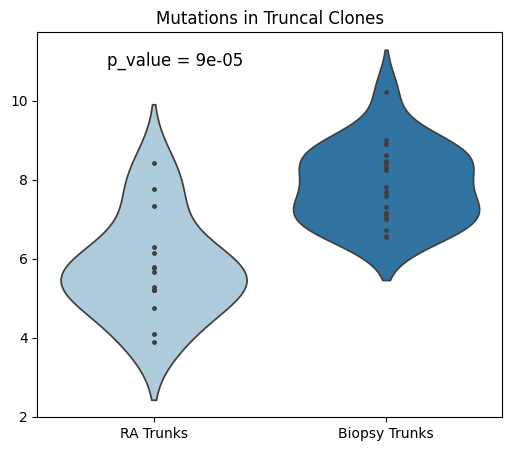

In [60]:
fig,ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
#ax1.set_ylim(bottom=0, top=25)
ax1.set_yticks([0,2,4,6,8,10,12,14,16,18,20,22])
sns.violinplot(data=muts_per_trunk_df,
               inner="point",orient='v',ax=ax1,palette=sns.color_palette('Paired'),
              native_scale=True).set_title("Mutations in Truncal Clones" )

stat, p_val = stats.mannwhitneyu(np.log2(autopsy_num_muts_in_trunk_list), np.log2(prepost_num_muts_in_trunk))


x_coord = 0.15 * (ax1.get_xlim()[1] - ax1.get_xlim()[0]) + ax1.get_xlim()[0]
y_coord = 0.95 * (ax1.get_ylim()[1] - ax1.get_ylim()[0]) + ax1.get_ylim()[0]
ax1.text(x=x_coord, y=y_coord, s="p_value = " + str(round(p_val,5)), ha='left', va='top', fontsize=12)

#fig.savefig('RA_muts_per_trunk_vs_biopsy_muts_per_paired_violinplot_with_p_val.svg')

## Compare Mutations in all subclones

### Autopsy

In [62]:
autopsy_all_nontrunks = combined_maf[combined_maf['Cluster_Assignment'] != 1]
## make sure we are just getting unique muts
autopsy_all_nontrunks_unique = autopsy_all_nontrunks.drop_duplicates(['Hugo_Symbol','Start_position','Protein_change'],keep='first')
RA_subclone_num_per_pat = [ len(autopsy_all_nontrunks_unique[autopsy_all_nontrunks_unique['Patient_ID'] == i]['Cluster_Assignment'].unique()) for i in list(autopsy_all_nontrunks_unique['Patient_ID'].unique()) ]
aut_num_muts_in_nontrunks = autopsy_all_nontrunks_unique.groupby('Patient_ID').count()['Sample_ID'].to_list()



### Biopsy

In [63]:
pre_post_nontrunks = pre_post_maf_only_pairs[pre_post_maf_only_pairs['Cluster_Assignment'] != 1]
## make sure we are just getting unique muts
pre_post_nontrunks_unique = pre_post_nontrunks.drop_duplicates(['Hugo_Symbol','Start_position','Protein_change','Patient_ID'],keep='first')
pre_post_num_nontrunks_unique = pre_post_nontrunks_unique.groupby('Patient_ID').count()['Sample_ID'].to_list()
print(np.median(pre_post_num_nontrunks_unique))

124.0


### Comparison

In [64]:
total_muts_per_subclone_df=pd.DataFrame({'RA Total Subclone': pd.Series(np.log2(aut_num_muts_in_nontrunks)),
                 'Biopsy Total Subclone': pd.Series(np.log2(pre_post_num_nontrunks_unique))})

/var/folders/rx/pxwbtcqd6k38h9yc5d3m4k1w0000gp/T/ipykernel_33366/1557138295.py:4: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.violinplot(data=total_muts_per_subclone_df,


Text(0.6000000000000001, 14.969089545792396, 'p_value = 0.04372')

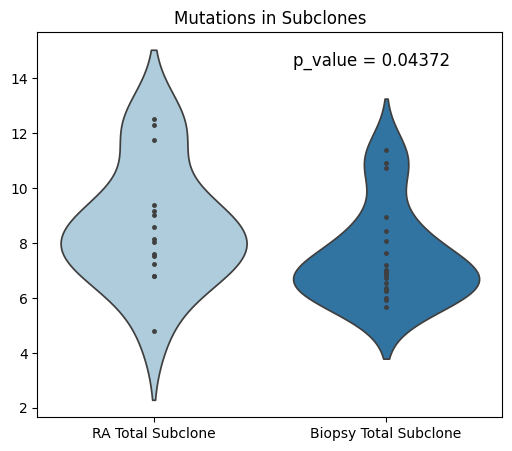

In [66]:
fig,ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
#ax1.set_ylim(bottom=0, top=25)
ax1.set_yticks([0,2,4,6,8,10,12,14,16,18,20,22])
sns.violinplot(data=total_muts_per_subclone_df,
               inner="point",orient='v',ax=ax1,palette=sns.color_palette('Paired'),
              native_scale=True).set_title("Mutations in Subclones")

stat, p_val = stats.mannwhitneyu(aut_num_muts_in_nontrunks,pre_post_num_nontrunks_unique)
x_coord = 0.55 * (ax1.get_xlim()[1] - ax1.get_xlim()[0]) + ax1.get_xlim()[0]
y_coord = 0.95 * (ax1.get_ylim()[1] - ax1.get_ylim()[0]) + ax1.get_ylim()[0]
ax1.text(x=x_coord, y=y_coord, s="p_value = " + str(round(p_val,5)), ha='left', va='top', fontsize=12)

#fig.savefig('RA_muts_subclones_vs_biopsy_muts_subclones_paired_violinplot_with_pval.svg')